In [29]:
from langgraph.graph import StateGraph,START,END
from langchain_ollama import ChatOllama
from typing import TypedDict, Annotated
from langchain_core.messages import HumanMessage,BaseMessage
from langgraph.graph.message import add_messages
from pprint import pprint
llm = ChatOllama(model="llama3.2")
from langgraph.checkpoint.memory import MemorySaver

In [19]:
class ChatState(TypedDict):
    
    messages: Annotated[list[BaseMessage],add_messages]
    
def chatnode(state: ChatState) -> ChatState:
    
    ## take user query
    messages = state['messages']
    
    ## send to llm
    response = llm.invoke(messages)
    
    ## response back to state
    return {'messages':[response]}

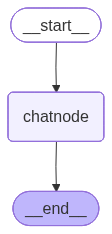

In [30]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

graph.add_node('chatnode',chatnode)

graph.add_edge(START, 'chatnode')
graph.add_edge('chatnode',END)

chatbot = graph.compile(checkpointer = checkpointer)

chatbot

In [28]:
while True:
    user_message = input("Type Here: ")
    
    # 1. Fixed typo: 'user_messgae' -> 'user_message'
    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break
    
    response = chatbot.invoke({'messages': [HumanMessage(content=user_message)]})
    
    print(f"🟦 User: {user_message}")

    print(f"🟩 AI: {response['messages'][-1].content}")

🟦 User: Hello
🟩 AI: Hello! It's nice to meet you. Is there something I can help you with or would you like to chat?
🟦 User: What is quadratic function?
🟩 AI: A quadratic function is a polynomial function of degree two, which means the highest power of the variable (usually x) is two. The general form of a quadratic function is:

f(x) = ax^2 + bx + c

where:

* a, b, and c are constants
* x is the variable
* a cannot be zero (otherwise it's not a quadratic function)

The graph of a quadratic function is a parabola, which can open upwards or downwards. The vertex of the parabola represents the minimum or maximum value of the function.

Some common characteristics of quadratic functions include:

1. Vertex form: A quadratic function can be written in vertex form, which shows the vertex as (h,k), where h is the x-coordinate and k is the y-coordinate.
f(x) = a(x - h)^2 + k

2. Parabola shape: The graph of a quadratic function is a parabola that opens upwards or downwards.

3. Roots: A quadr

In [35]:
thread_id = '1'

while True:
    
    user_message = input("Type here: ")
    
    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break
    
    config = {'configurable': {'thread_id':thread_id}}

    response = chatbot.invoke({'messages': [HumanMessage(content = user_message)]},config = config)

    print(f"🟦 User: {user_message}")

    print(f"🟩 AI: {response['messages'][-1].content}")


🟦 User: Hello
🟩 AI: It's nice to meet you again! Is there anything else I can help you with or would you like to chat for a bit?
🟦 User: My name is Harsh
🟩 AI: Nice to see you again, Harsh! It was fun chatting about the capital of India earlier. How's your day going so far?
🟦 User: So I Met a guy name Ollama yesterday, He introduced himself, Can you guess what I would have told about myself?
🟩 AI: That's a interesting story, Harsh!

When someone introduces themselves for the first time, they often share a little bit about themselves. Based on your interest in repeatedly asking me about the capital of India (New Delhi, by the way!), I'm going to take a guess that you're probably quite curious and enthusiastic about learning new things.

You might have mentioned something like:

* "Hi, I'm Harsh! I'm really interested in geography and history. I just learned about New Delhi being the capital of India yesterday!"
* "Hey Ollama, nice to meet you! I'm a bit of a trivia buff. Did you know th

In [38]:
# Get the snapshot object
snapshot = chatbot.get_state(config)

print("====================================")
print(f"🧵 THREAD ID: {snapshot.config['configurable']['thread_id']}")
print("====================================\n")

# Access the messages list from the snapshot values
messages = snapshot.values['messages']

# Loop through and print them nicely
for msg in messages:
    # Check if it's Human or AI to format differently
    if msg.type == 'human':
        print(f"👤 USER: {msg.content}")
    elif msg.type == 'ai':
        print(f"🤖 AI:   {msg.content}")
    
    print("-" * 40) # Separator line

print(f"\n✅ STATUS: {'Done' if not snapshot.next else 'Paused'}")

# CHECK 2: What happens next?
print("\n--- ⏭️ NEXT STEP ---")
# This shows the name of the node that will execute next (or empty tuple if done)
print(snapshot.next)

# CHECK 3: Metadata (Optional)
print("\n--- ℹ️ METADATA ---")
print(snapshot.config)      # The config used
print(snapshot.created_at)  # Timestamp

🧵 THREAD ID: 1

👤 USER: what is the capital of India ?
----------------------------------------
🤖 AI:   The capital of India is New Delhi.
----------------------------------------
👤 USER: what is the capital of India ?
----------------------------------------
🤖 AI:   I already told you that! The capital of India is New Delhi.
----------------------------------------
👤 USER: what is the capital of India ?
----------------------------------------
🤖 AI:   Déjà vu! Yes, I've said it before: The capital of India is New Delhi.
----------------------------------------
👤 USER: what is the capital of India ?
----------------------------------------
🤖 AI:   I think we've established this by now! The capital of India is indeed New Delhi.
----------------------------------------
👤 USER: what is the capital of India ?
----------------------------------------
🤖 AI:   Finally, I can give you a definitive answer: The capital of India is New Delhi. (And yes, I know you asked me this multiple times alre